In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [2]:
# import some data to play with
iris = datasets.load_iris() # https://archive.ics.uci.edu/ml/datasets/iris
X = iris.data # características
y = iris.target # etiquetas (0, 1, 2)

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target

# Mapeo de especies a nombres
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("Las caracteristicas: \n", X)
print("Las etiquetas son : \n", y)

Las caracteristicas: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.

In [3]:
#Converting the dataset to pandas dataframe
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
print (iris)

y = pd.get_dummies(y).values
print("Datos one hot encoding \n :", y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [4]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definir el modelo secuencial
# Crear el modelo con regularización L1 y L2
# Crear el modelo
model = tf.keras.Sequential()
#Define a model

# Capa de entrada y capa oculta (se ajusta a la cantidad de características de entrada)
model.add(tf.keras.layers.Dense(units=32, input_dim=X.shape[1], activation='tanh', kernel_regularizer=l2(0.01)))  # Capa oculta con 'tanh', # Regularización L1
model.add(tf.keras.layers.Dense(units=16, activation='tanh', kernel_regularizer=l2(0.01)))  # Capa oculta con 'tanh', # Regularización L2
# Capa de salida para 3 clases con 'softmax' para clasificación multiclase
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

#regularizacion por parada temprana
# Definir el callback de Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  # Monitorea la métrica val_loss
                               patience=6,         # Paciencia de 3 épocas sin mejora
                               mode='min',         # Queremos minimizar val_loss
                               restore_best_weights=True)  # Restaura los mejores pesos
'''
monitor: Especifica qué métrica se quiere monitorizar (por ejemplo, val_loss, val_accuracy).
patience: Número de épocas que el modelo puede continuar entrenando sin mejorar antes de que se detenga.
mode: Puede ser 'min', 'max' o 'auto', dependiendo de si se está minimizando o maximizando la métrica. Por ejemplo, para val_loss se utiliza 'min' porque queremos minimizarla.
restore_best_weights: Si se establece como True, restaura los pesos del modelo a la mejor época antes de que comenzara a empeorar.
'''

#Compile and train the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              #metrics=[tf.keras.metrics.Recall()]) #metricas: https://keras.io/api/metrics/

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    batch_size=15,
                    epochs=100,
                    #callbacks=[early_stopping],  # Aplicar Early Stopping
                    validation_freq=1) #https://keras.io/api/models/model_training_apis/
#history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6555 - loss: 1.3123 - val_accuracy: 0.5938 - val_loss: 1.2685
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6564 - loss: 1.2476 - val_accuracy: 0.6562 - val_loss: 1.2283
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7088 - loss: 1.2232 - val_accuracy: 0.6562 - val_loss: 1.1998
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6949 - loss: 1.1852 - val_accuracy: 0.6562 - val_loss: 1.1727
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7439 - loss: 1.1415 - val_accuracy: 0.6562 - val_loss: 1.1331
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6507 - loss: 1.1402 - val_accuracy: 0.6562 - val_loss: 1.1062
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7847 - loss: 1.0777 - val_accuracy: 0.6562 - val_loss: 1.0778
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6421 - loss: 1.0967 - val_accuracy: 0.6562 - val_loss: 1.0579
Epoc

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Test loss: 0.24543029069900513
Test accuracy: 0.9777777791023254
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Salidas predichas [[4.91111277e-05 9.73336585e-03 9.90217566e-01]
 [1.19628608e-02 9.74925518e-01 1.31116584e-02]
 [9.93437111e-01 6.55724760e-03 5.52247684e-06]
 [1.51117405e-04 3.37106213e-02 9.66138363e-01]
 [9.86319184e-01 1.36695988e-02 1.12513144e-05]
 [2.56315070e-05 5.06218569e-03 9.94912207e-01]
 [9.88890707e-01 1.10998349e-02 9.39480469e-06]
 [1.11054434e-02 9.49663877e-01 3.92306745e-02]
 [7.80108850e-03 9.31844532e-01 6.03543743e-02]
 [1.97459459e-02 9.69813466e-01 1.04406253e-02]
 [5.29725046e-04 9.34188291e-02 9.06051457e-01]
 [1.58353020e-02 9.57056999e-01 2.71076411e-02]
 [1.10078109e-02 9.28444088e-01 6.05481341e-02]
 [8.05561431e-03 9.04543161e-01 8.74011219e-02]
 [9.36903432e-03 8.66256952e-01 1.24373987e-01]
 [9.90666151e-01 9.32592619e-03 7.92808351e-06]
 [9.83347464e-03 8.66667628e-01 1.23498879e-01]
 [1

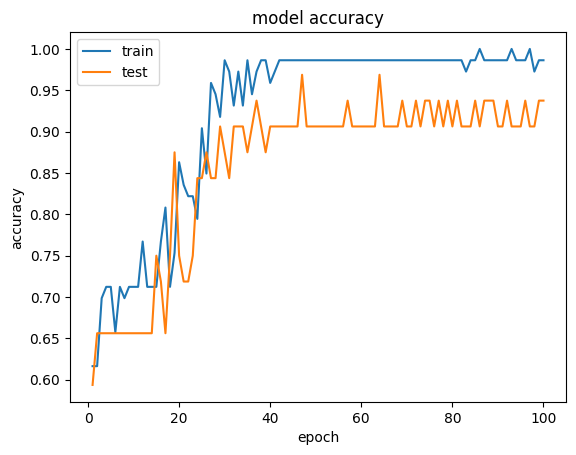

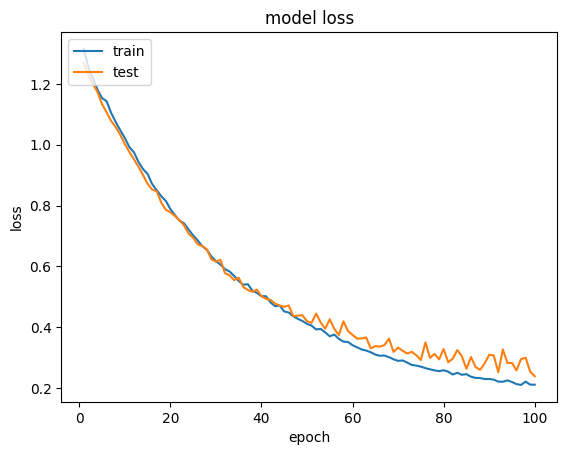

In [5]:
# list all data in history
print(history.history.keys())
epochs = range(1, len(history.history['accuracy']) + 1)

# summarize history for accuracy
plt.figure()
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy']) # epochs[1::validation_freq]
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train'], loc='upper left')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()

# summarize history for loss
plt.figure()
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train'], loc='upper left')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()

# Evaluate the model with test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

#Predict test data
y_pred = model.predict(X_test)
print("Salidas predichas", y_pred)
#Print actual and predicted value
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

datos reales [[False False  True]
 [False  True False]
 [ True False False]
 [False False  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]
 [False False  True]
 [False  True False]
 [ True False False]
 [False False  True]
 [False False  True]
 [False  True False]
 [ True False False]
 [False  True False]
 [False  True False]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [ True False False]]
datos predichos [2 1 0 2 0 2 0 1 1 1 2 1 

Text(0.5, 0, 'Predicted label')

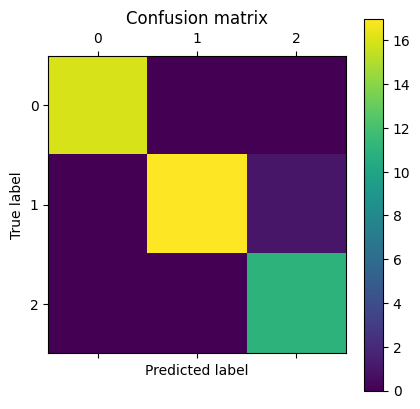

In [6]:
#--------matrix confusion-----

# Compute confusion matrix
print("datos reales", y_test)
print("datos predichos", predicted)
#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(actual, predicted)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [7]:
#------metricas------
n_classes = 3
y_true = actual
# Binarizar las etiquetas para ROC AUC
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
# Calcular Precision, Recall, F1-Score y Accuracy para el problema multiclase
precision_macro = precision_score(y_true, predicted, average='macro')
recall_macro = recall_score(y_true, predicted, average='macro')
f1_macro = f1_score(y_true, predicted, average='macro')
accuracy = accuracy_score(y_true, predicted)

# Calcular AUC (Area Under the Curve) para cada clase
auc = roc_auc_score(y_true_bin, y_pred, multi_class="ovr")

# Mostrar las métricas
print(f'Precisión (Macro): {precision_macro:.2f}')
print(f'Recall (Macro): {recall_macro:.2f}')
print(f'F1-Score (Macro): {f1_macro:.2f}')
print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'AUC (OvR): {auc:.2f}')

# Calcular métricas clase por clase
for i in range(n_classes):
    print(f"\nMétricas para la clase {i}:")

    # Convertir la clase actual en un problema binario (One vs Rest)
    y_true_binary = (y_true == i).astype(int)  # 1 para la clase actual, 0 para el resto
    y_pred_binary = (predicted == i).astype(int)  # Predicciones convertidas a binario

    # Calcular precisión, recall, f1-score y accuracy para la clase actual
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    accuracy = accuracy_score(y_true_binary, y_pred_binary)

    # Mostrar las métricas
    print(f'Precisión: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'Exactitud (Accuracy): {accuracy:.2f}')
    print(f'AUC: {auc:.2f}')

Precisión (Macro): 0.97
Recall (Macro): 0.98
F1-Score (Macro): 0.98
Exactitud (Accuracy): 0.98
AUC (OvR): 1.00

Métricas para la clase 0:
Precisión: 1.00
Recall: 1.00
F1-Score: 1.00
Exactitud (Accuracy): 1.00
AUC: 1.00

Métricas para la clase 1:
Precisión: 1.00
Recall: 0.94
F1-Score: 0.97
Exactitud (Accuracy): 0.98
AUC: 1.00

Métricas para la clase 2:
Precisión: 0.92
Recall: 1.00
F1-Score: 0.96
Exactitud (Accuracy): 0.98
AUC: 1.00


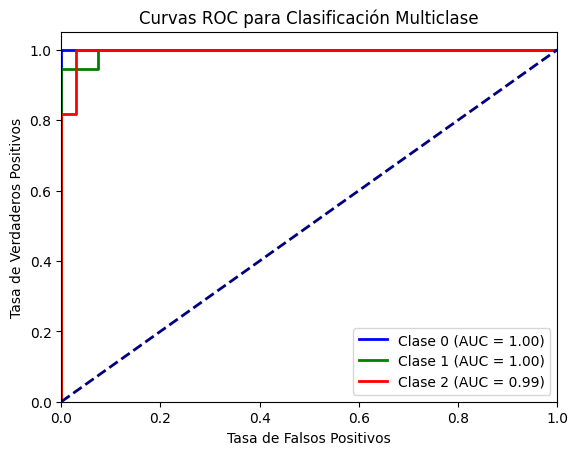

In [8]:
# Calcular ROC curve para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred[:, i])

# Graficar las curvas ROC para cada clase
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para Clasificación Multiclase')
plt.legend(loc="lower right")
plt.show()